In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress

In [26]:
def mbar_to_torr(mbar):
    return mbar*1e-3*1e5/(101325/760)
def torr_to_mbar(torr):
    return torr*1e3*1e-5*(101325/760)

In [27]:
vol_zyl=lambda r,l:np.pi*r**2*l
def zyl(obj):
    l,lerr,d,derr=obj
    r=d/2
    rerr=derr/2
    return np.pi*r**2*l,np.pi*2*(rerr*l+lerr*r)
rez1=(6.1,0.1,1.06,0.1)
ion=(0.85,0.05,0.58,0.05)
pen1=(0.75,0.05,0.7,0.05)
pen2=(0.6,0.05,0.25,0.05)
bar12=(0.92,0.05,0.73,0.05)
pir=(0.6,0.06,0.03,0.05)
tube=(10,1,0.2,0.05)
group=np.array([rez1,ion,pen1,pen2,bar12,bar12,pir,tube])
voloume=np.sum([zyl(obj)[0] for obj in group])
voloume_err=np.sum([zyl(obj)[1] for obj in group])
print(f"Das Voloumen beträgt {voloume:.1f}l mit einerm Fehler von {voloume_err:.1f}l")

Das Voloumen beträgt 7.0l mit einerm Fehler von 5.7l


In [28]:
file="data/leckrate/leckrate1"
file2="data/leckrate/leckrate2"
data=np.loadtxt(file)
data2=np.loadtxt(file2)
time=np.append(np.arange(0,185,10),np.arange(190,1210,30))
pressure=[]
pressure2=data2
for line in data:
    pressure.append(line[1])

time=np.array(time)
pressure=np.array(pressure)

In [29]:
linreg=linregress(time,pressure)
reg=lambda x: linreg.slope*x+linreg.intercept
reg_error=lambda x: linreg.stderr*x+linreg.intercept_stderr
print(f"Die Steigung beträgt vor den Messungen{torr_to_mbar(linreg.slope)} +- {torr_to_mbar(linreg.stderr)}")
print(f"Die Leckrate beträgt vor den Messungen{torr_to_mbar(linreg.slope)*voloume} +- {torr_to_mbar(linreg.stderr)*voloume+torr_to_mbar(linreg.slope)*voloume_err}")

Die Steigung beträgt vor den Messungen7.907501064470651e-05 +- 1.834661679758948e-07
Die Leckrate beträgt vor den Messungen0.0005543510254083473 +- 0.0004482709350210807


In [30]:
linreg2=linregress(time,pressure2)
reg2=lambda x: linreg2.slope*x+linreg2.intercept
reg_error2=lambda x: linreg2.stderr*x+linreg2.intercept_stderr
print(f"Die Steigung beträgt vor den Messungen{torr_to_mbar(linreg2.slope)} +- {torr_to_mbar(linreg2.stderr)}")
print(f"Die Leckrate beträgt vor den Messungen{torr_to_mbar(linreg2.slope)*voloume} +- {torr_to_mbar(linreg2.stderr)*voloume+torr_to_mbar(linreg.slope)*voloume_err}")

Die Steigung beträgt vor den Messungen0.00013033127704239602 +- 7.856697088583413e-07
Die Leckrate beträgt vor den Messungen0.0009136802699383285 +- 0.00045249264991774595


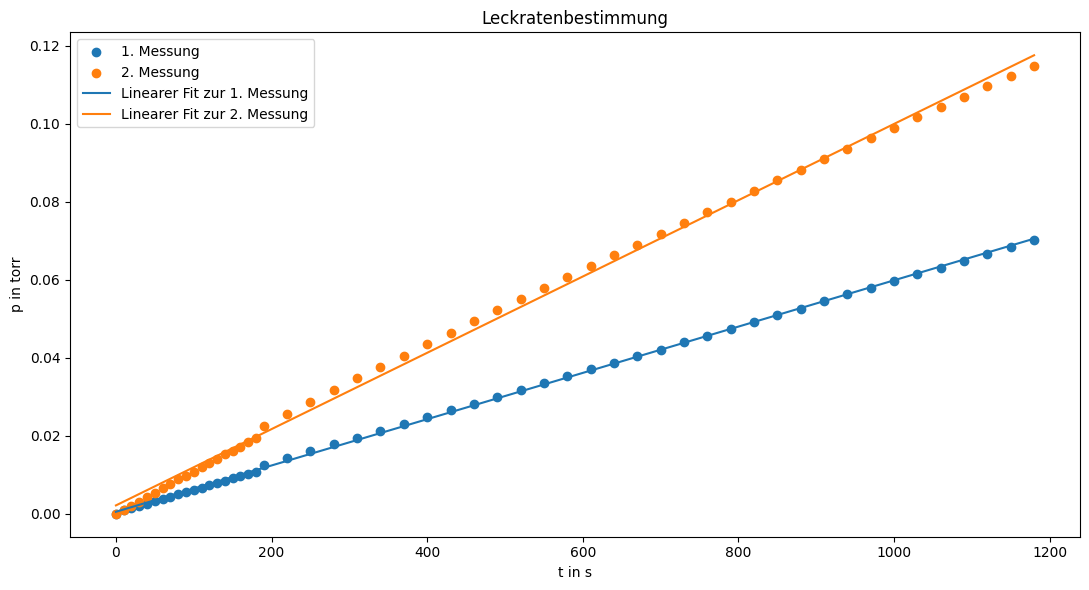

In [31]:
fig = plt.figure(figsize=(11, 6))
gs = GridSpec(8, 5)
fig1 = fig.add_subplot(gs[:, :])
fig1.set_title("Leckratenbestimmung")
fig1.set_ylabel("p in torr")
fig1.set_xlabel("t in s")
fig1.scatter(time,pressure,c="C0",label="1. Messung")
fig1.scatter(time,pressure2,c="C1",label="2. Messung")
fig1.plot(time,reg(time),c="C0",label="Linearer Fit zur 1. Messung")
fig1.plot(time,reg2(time),c="C1",label="Linearer Fit zur 2. Messung")
# fig1.plot(time,reg(time)+reg_error(time),c="C0",ls="--",label="Fehlerschlauch zum Fit")
# fig1.plot(time,reg(time)-reg_error(time),c="C0",ls="--")
plt.tight_layout()
plt.legend()
plt.savefig("plots/leckrate/leckrate.pdf")
plt.show()